In [34]:
import sqlite3
from imd2SQL import dbPath
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from barnetLSOA import barnetLsoaPath
import numpy as np

In [35]:
path = dbPath()
conn = sqlite3.connect(path)
cursor = conn.cursor()
query15 = """SELECT *
FROM IOD_feature_code_decile_15"""
query19 = """SELECT *
FROM IOD_feature_code_decile_19"""
dec15 = pd.read_sql(query15, conn)
dec19 = pd.read_sql(query19, conn)

barnet = pd.read_csv(barnetLsoaPath())["LSOA code"]

In [36]:
dec15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32844 entries, 0 to 32843
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   LSOA Code                                                    32844 non-null  object 
 1   a. Index of Multiple Deprivation (IMD)                       32844 non-null  float64
 2   b. Income Deprivation Domain                                 32844 non-null  float64
 3   c. Employment Deprivation Domain                             32844 non-null  float64
 4   d. Education, Skills and Training Domain                     32844 non-null  float64
 5   e. Health Deprivation and Disability Domain                  32844 non-null  float64
 6   f. Crime Domain                                              32844 non-null  float64
 7   g. Barriers to Housing and Services Domain                   32844 non-null 

In [37]:
barnet

0      E01000248
1      E01000249
2      E01000250
3      E01000254
4      E01000292
         ...    
206    E01000224
207    E01000137
208    E01000139
209    E01000140
210    E01000143
Name: LSOA code, Length: 211, dtype: object

In [38]:
barnetIMD15 = dec15[dec15["LSOA Code"].isin(barnet)]
barnetIMD15.set_index("LSOA Code", inplace=True)


In [52]:
barnetIMD15.corr()

,a. Index of Multiple Deprivation (IMD),b. Income Deprivation Domain,c. Employment Deprivation Domain,"d. Education, Skills and Training Domain",e. Health Deprivation and Disability Domain,f. Crime Domain,g. Barriers to Housing and Services Domain,h. Living Environment Deprivation Domain,i. Income Deprivation Affecting Children Index (IDACI),j. Income Deprivation Affecting Older People Index (IDAOPI)
a. Index of Multiple Deprivation (IMD),1.000000,0.939266,0.909316,0.842496,0.840431,0.468875,0.670038,0.374872,0.894133,0.851362
b. Income Deprivation Domain,0.939266,1.000000,0.926513,0.822074,0.819573,0.336104,0.570655,0.259378,0.947350,0.872620
c. Employment Deprivation Domain,0.909316,0.926513,1.000000,0.798030,0.848409,0.315365,0.513309,0.185131,0.858040,0.774325
"d. Education, Skills and Training Domain",0.842496,0.822074,0.798030,1.000000,0.749604,0.337551,0.525169,0.135161,0.791655,0.723745
e. Health Deprivation and Disability Domain,0.840431,0.819573,0.848409,0.749604,1.000000,0.253322,0.479251,0.164959,0.746271,0.756247
f. Crime Domain,0.468875,0.336104,0.315365,0.337551,0.253322,1.000000,0.204591,0.300107,0.315192,0.256094
g. Barriers to Housing and Services Domain,0.670038,0.570655,0.513309,0.525169,0.479251,0.204591,1.000000,0.257405,0.537679,0.562482
h. Living Environment Deprivation Domain,0.374872,0.259378,0.185131,0.135161,0.164959,0.300107,0.257405,1.000000,0.264756,0.379348
i. Income Deprivation Affecting Children Index (IDACI),0.894133,0.947350,0.858040,0.791655,0.746271,0.315192,0.537679,0.264756,1.000000,0.779426
j. Income Deprivation Affecting Older People Index (IDAOPI),0.851362,0.872620,0.774325,0.723745,0.756247,0.256094,0.562482,0.379348,0.779426,1.000000


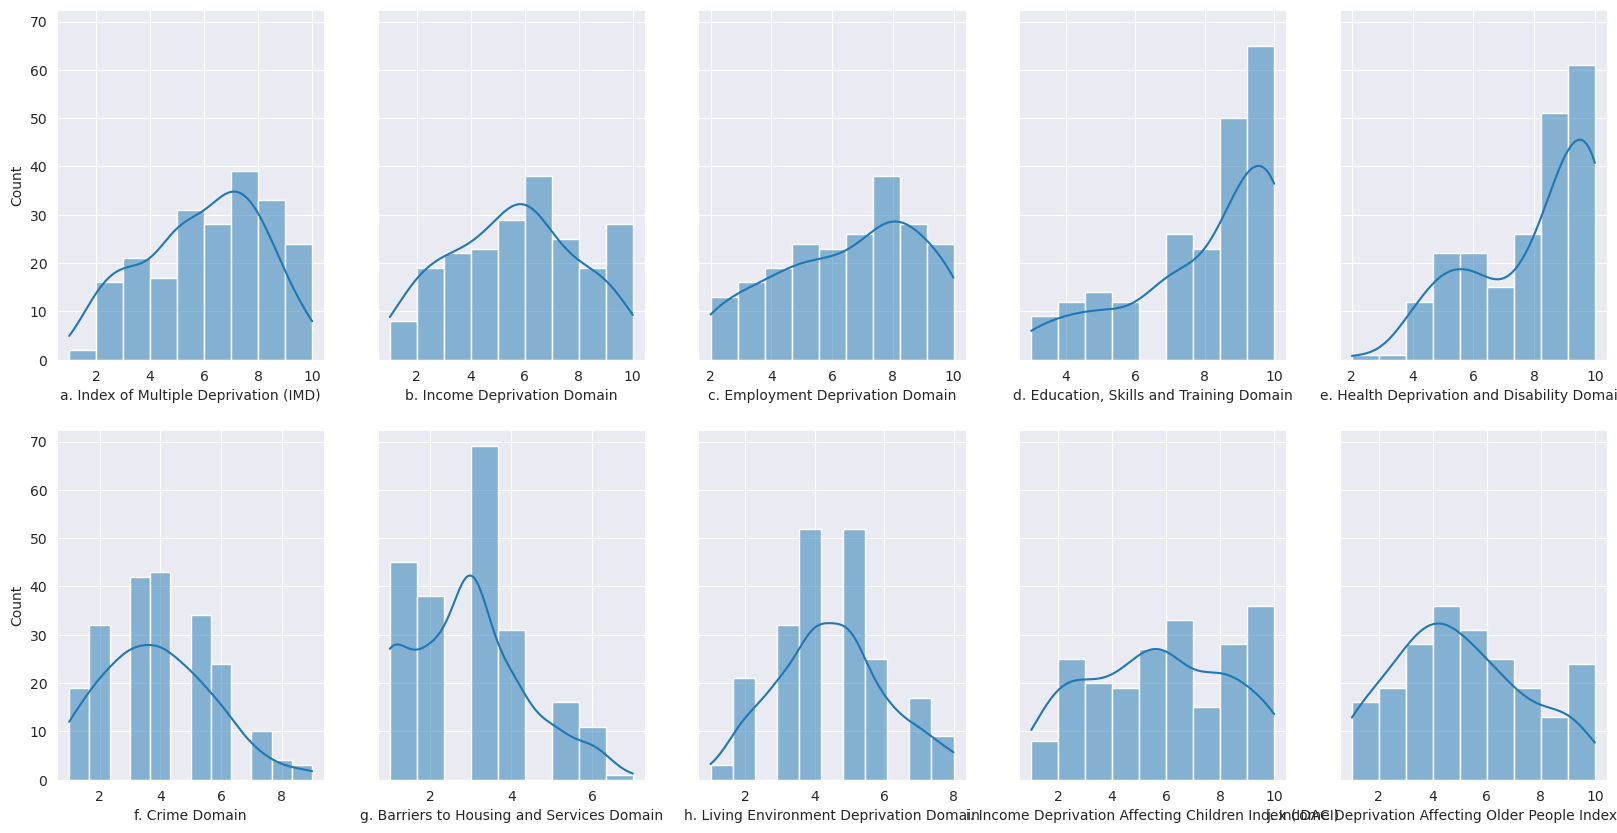

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=int(len(barnetIMD15.columns)/2), figsize=(20,10), sharey=True)
# print(axes)
axes = axes.flatten()
# print(axes)
for index, ax in enumerate(axes):
    # print((barnetIMD.columns[index], ax))
    sns.histplot(barnetIMD15.reset_index(drop=True)[barnetIMD15.columns[index]], kde=True, ax=ax)
#
plt.show()

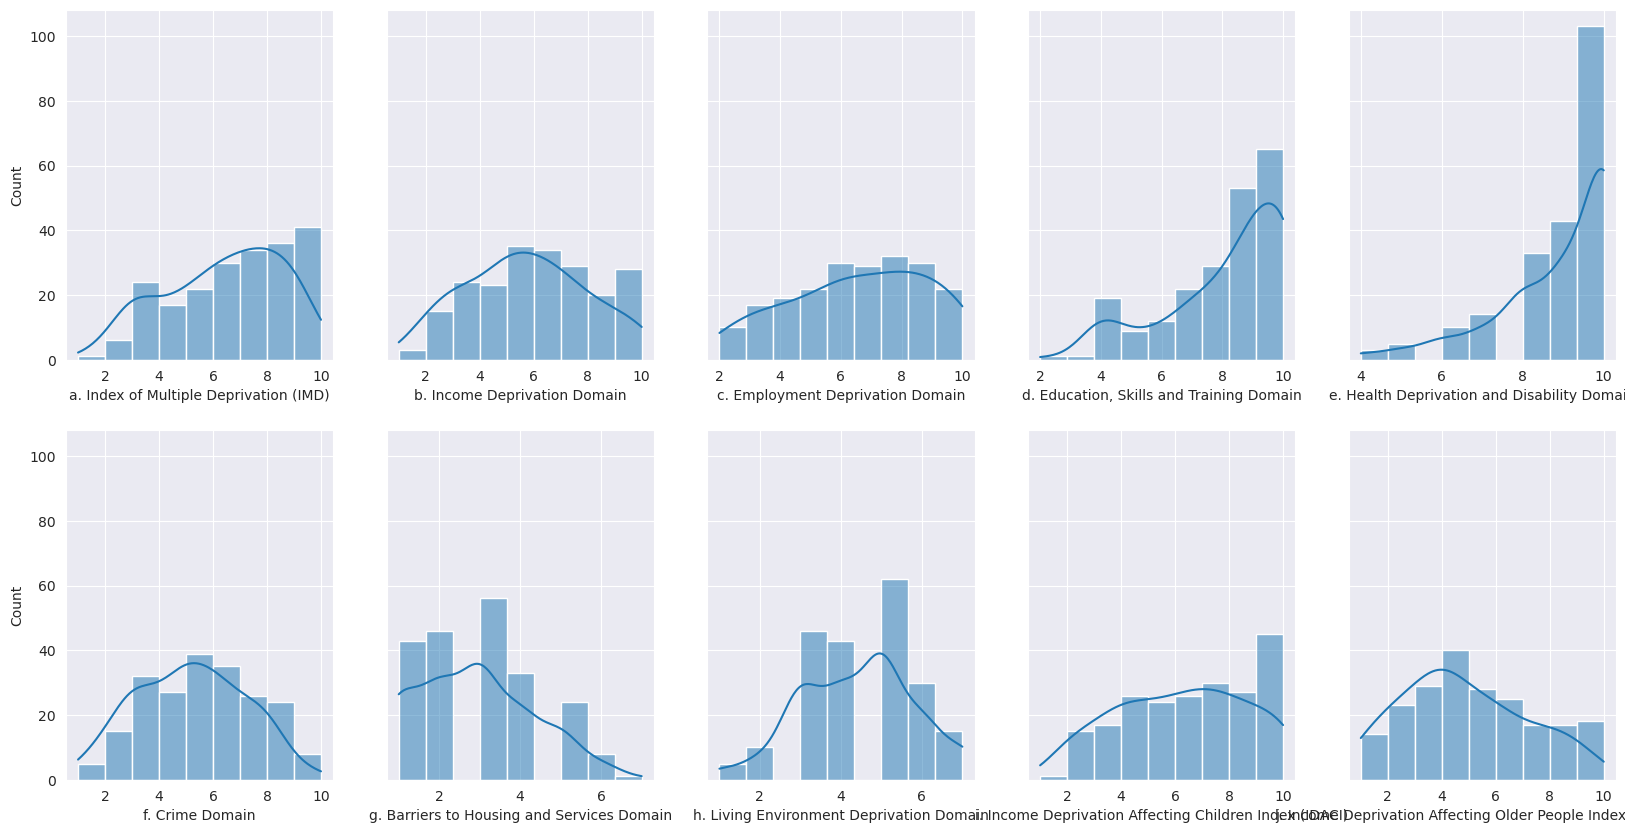

In [40]:
barnetIMD19 = dec19[dec19["LSOA Code"].isin(barnet)]
barnetIMD19.set_index("LSOA Code", inplace=True)
fig, axes = plt.subplots(nrows=2, ncols=int(len(barnetIMD19.columns) / 2), figsize=(20, 10), sharey=True)
# print(axes)
axes = axes.flatten()
# print(axes)
for index, ax in enumerate(axes):
    # print((barnetIMD.columns[index], ax))
    sns.histplot(barnetIMD19.reset_index(drop=True)[barnetIMD19.columns[index]], kde=True, ax=ax)
#
plt.show()


In [51]:
dec15["e. Health Deprivation and Disability Domain"].skew()

-1.0279520348231296e-05

<Axes: ylabel='Count'>

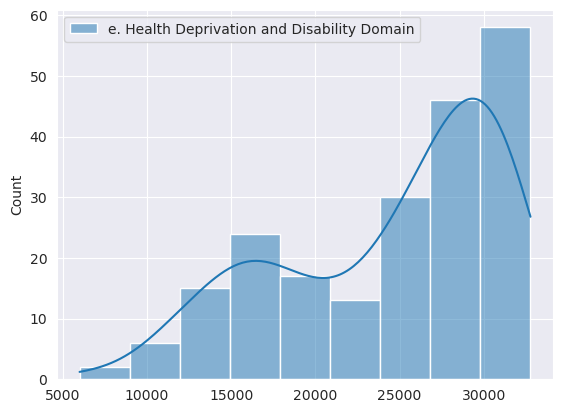

In [46]:
queryRank15 = """
SELECT "LSOA Code", "e. Health Deprivation and Disability Domain"
FROM IOD_feature_code_rank_15"""

test =pd.read_sql(queryRank15, conn)
brtest = test[test["LSOA Code"].isin(barnet)]
sns.histplot(brtest.reset_index(drop=True), kde=True)